In [1]:
import pandas as pd
# 读取Excel文件并转成CSV文件
# 载入包含原始表格的 Excel 文件
file_path = r'异常话单样例_标注.xlsx'
xls = pd.ExcelFile(file_path)
# 读取 Excel 文件中的表格以获取列名和数据
df1 = pd.read_excel(xls, sheet_name=xls.sheet_names[1])
# 表格第一行作为表头
df1.columns = df1.iloc[3]
# # 打印前2-5行
# print(df1[2:])
# 保存CSV格式文件
df1[4:].to_csv('异常话单样例_标注.csv', index=False, encoding='utf-8')
# 读取CSV文件
csv = pd.read_csv('异常话单样例_标注.csv')
# 打印前2-5行
# 标题是第二行，数据是第三行
# print(csv)

In [2]:
# 给CSV数据进行一下数据清理，比如说删除掉值都为空的列，或者删除值都为同一个值得列，然后你在帮我看看还有没有其他的数据清洗方法

# 删除掉值都为空的列
csv.dropna(axis=1, how='all', inplace=True)
print(csv)


   CDRTYPE  ROAMTYPE  CALLTYPE       TELNUM  省份   城市  VREGION  HREGION  \
0        O         0        22  1510333****  河北  张家口      313      313   
1        O         0        22  1510333****  河北  张家口      313      313   
2        O         0        22  1383136****  河北  张家口      313      313   
3        O         0        22  1833131****  河北  张家口      313      313   
4        O         0        22  1364313****  河北  张家口      313      313   
5        O         0        22  1503032****  河北  张家口      313      313   
6        O         0        22  1393365****  河北  秦皇岛      335      335   
7        O         0        22  1593003****  河北  秦皇岛      335      335   
8        O         0        22  1871338****  河北  张家口      313      313   
9        O         0        22  1383353****  河北  秦皇岛      335      335   
10       O         0        22  1378419****  河北  秦皇岛      335      335   
11       O         0        22  1364313****  河北  张家口      313      313   
12       O         0        22  138313

In [3]:
# 删除掉值都为同一个值得列，值全都不一样也删除
for col in csv.columns:
    # 删除前后空格
    if csv[col].dtype == 'object':
        csv[col] = csv[col].str.strip()
    if len(csv[col].unique()) == 1 or len(csv[col].unique()) == len(csv):
        csv.drop(col, axis=1, inplace=True)
print(csv)

         TELNUM   城市  VREGION  HREGION  OTHERTELNUM  OTHERVREGION  \
0   1510333****  张家口      313      313       668163           668   
1   1510333****  张家口      313      313       668163           668   
2   1383136****  张家口      313      313       668163           668   
3   1833131****  张家口      313      313       668163           668   
4   1364313****  张家口      313      313       668163           668   
5   1503032****  张家口      313      313       668169           668   
6   1393365****  秦皇岛      335      335       668169           668   
7   1593003****  秦皇岛      335      335       668169           668   
8   1871338****  张家口      313      313       668169           668   
9   1383353****  秦皇岛      335      335       668169           668   
10  1378419****  秦皇岛      335      335       668169           668   
11  1364313****  张家口      313      313       668163           668   
12  1383136****  张家口      313      313       668163           668   
13  1510333****  张家口      313     

In [4]:
# 删除掉特定的列
cols = ['TELNUM','SOURFILENAME','OTHERTELNUM']
for col in cols:
    if col in csv.columns:
        csv.drop(col, axis=1, inplace=True)
print(csv.shape)
# print(csv)
print(csv.columns)
# 保存CSV格式文件
csv.to_csv('异常话单样例_标注_1.csv', index=False, encoding='utf-8')

(50, 14)
Index(['城市', 'VREGION', 'HREGION', 'OTHERVREGION', 'OTHERHREGION',
       'OTHERMANAGE', 'LAC', 'CELLID', 'DURATION', 'SPECIALTYPE', 'TOTAL_FREE',
       'FREEFORMATDATA', 'ORG_HREGION', 'ORG_OTHERHREGION'],
      dtype='object')


In [5]:
# nan值处理
# nan的单元格补0
csv.fillna('0', inplace=True)
# 把除了DURATION列的其他列转换为str
for col in csv.columns:
    if col != 'DURATION':
        csv[col] = csv[col].astype('str')
print(csv)
csv.to_csv('异常话单样例_标注_2.csv', index=False, encoding='utf-8')

     城市 VREGION HREGION OTHERVREGION OTHERHREGION OTHERMANAGE     LAC  \
0   张家口     313     313          668          668         2.2    3187   
1   张家口     313     313          668          668         2.2    3187   
2   张家口     313     313          668          668         2.2    3187   
3   张家口     313     313          668          668         2.2    3187   
4   张家口     313     313          668          668         2.2  22031A   
5   张家口     313     313          668          668         2.2    3187   
6   秦皇岛     335     335          668          668         2.2  220B06   
7   秦皇岛     335     335          668          668         2.2    307F   
8   张家口     313     313          668          668         2.2  22031A   
9   秦皇岛     335     335          668          668         2.2    307F   
10  秦皇岛     335     335          668          668         2.2  220B06   
11  张家口     313     313          668          668         2.2  22031A   
12  张家口     313     313          668          668  

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置Matplotlib字体
font_path = 'C:/Windows/Fonts/simsun.ttc'  # 你可以选择其他支持中文的字体路径
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 读取CSV文件
file_path = '异常话单样例_标注_2.csv'
csv = pd.read_csv(file_path)

# 编码分类变量
label_encoders = {}
for column in csv.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    csv[column] = le.fit_transform(csv[column])
    label_encoders[column] = le

# 特征和目标变量
X = csv.drop(columns=['SPECIALTYPE'])
y = csv['SPECIALTYPE']

# 将数据集分为训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用随机森林进行训练
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 使用验证集进行预测
y_pred = clf.predict(X_test)

# 计算并输出模型的评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"准确率: {accuracy:.4f}")
print(f"精确率: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1分数: {f1:.4f}")

# 输出分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred))

# 输出混淆矩阵
print("\n混淆矩阵:")
print(confusion_matrix(y_test, y_pred))

准确率: 0.9000
精确率: 0.9167
召回率: 0.9000
F1分数: 0.8974

分类报告:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         1

    accuracy                           0.90        10
   macro avg       0.94      0.92      0.92        10
weighted avg       0.92      0.90      0.90        10


混淆矩阵:
[[5 0 0]
 [1 3 0]
 [0 0 1]]


In [7]:
# 获取特征重要性
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# 输出与SPECIALTYPE关系最大的特征
print("与SPECIALTYPE关系最大的特征：")
print(feature_importances.head(10))

与SPECIALTYPE关系最大的特征：
CELLID            0.300290
DURATION          0.217705
城市                0.078223
VREGION           0.072089
HREGION           0.060726
ORG_HREGION       0.056300
LAC               0.036832
OTHERHREGION      0.034896
FREEFORMATDATA    0.034263
TOTAL_FREE        0.032135
dtype: float64


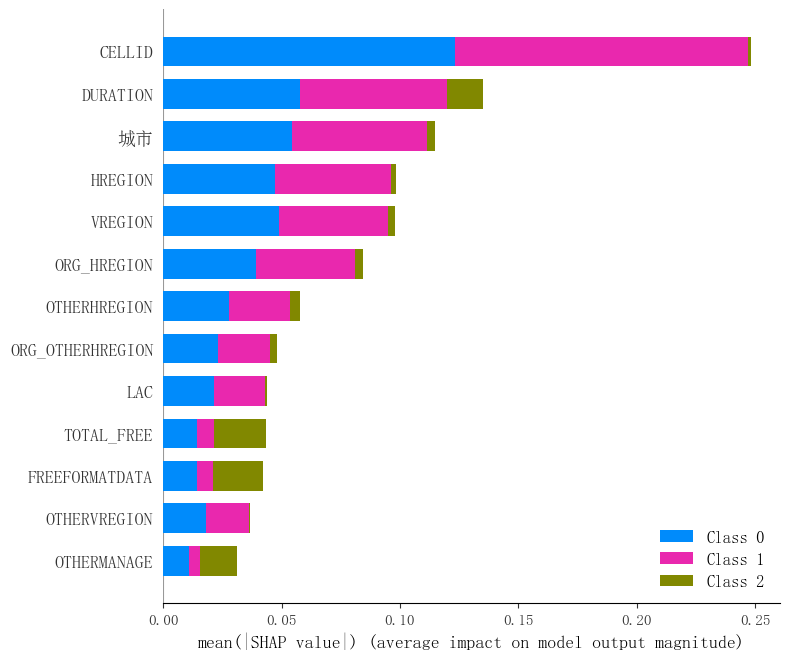

In [8]:
# 使用SHAP解释模型
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

# 可视化SHAP值
shap.summary_plot(shap_values, X, plot_type="bar")  # 条形图
# shap.summary_plot(shap_values, X)  # 散点图

Glyph 8722 (\N{MINUS SIGN}) missing from current font.


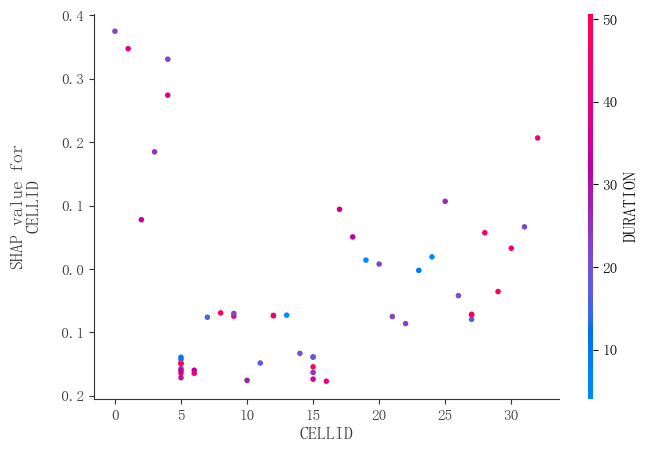

In [9]:
# 绘制依赖图，展示某个特征对模型预测的影响
shap.dependence_plot("CELLID", shap_values[1], X)

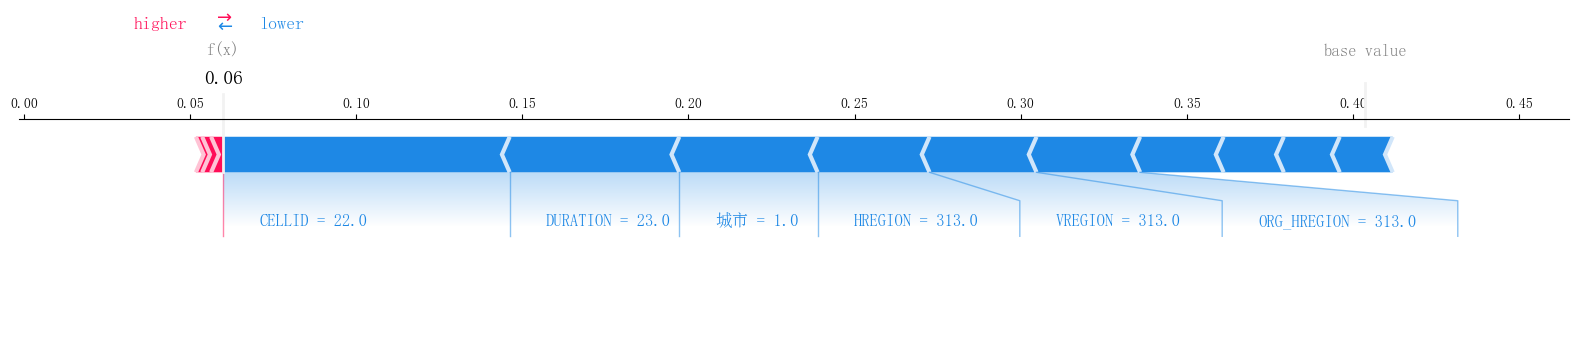

Glyph 8722 (\N{MINUS SIGN}) missing from current font.


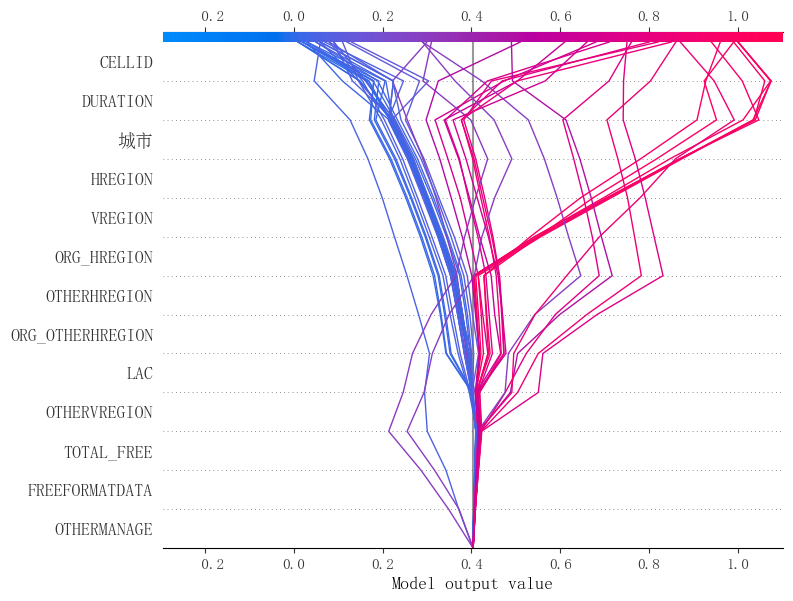

Glyph 8722 (\N{MINUS SIGN}) missing from current font.


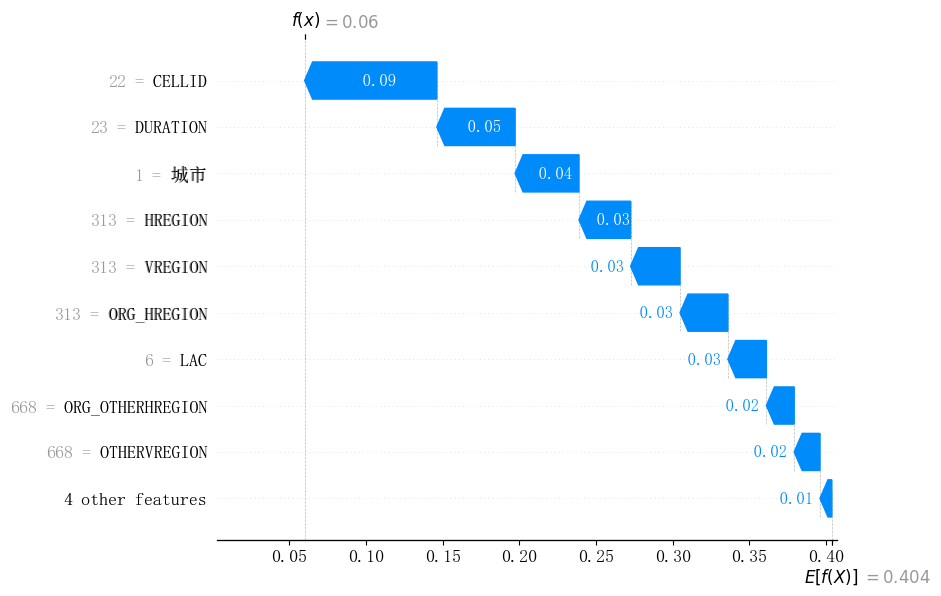

In [10]:
# 绘制力图，展示一个样本的SHAP值如何影响预测
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:], matplotlib=True)
# 绘制决策图
shap.decision_plot(explainer.expected_value[1], shap_values[1], X)
# 绘制水滴图，展示一个样本的特征贡献
shap.waterfall_plot(shap.Explanation(values=shap_values[1][0], base_values=explainer.expected_value[1], data=X.iloc[0,:]))